<a href="https://colab.research.google.com/github/janzaw04/machinelearning/blob/main/LAB_3_multi_armed_bandit_STARTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [35]:
NUM_TRIALS = 10000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]
EPSILON = 0.01

In [36]:
class Bandit:
  def __init__(self, q):
    self.q = q
    self.q_estimate = 7.
    self.N = 0. 

  def pull(self):
    return np.random.random() < self.q

  def update(self, r):
    self.N += 1.
    self.q_estimate = ((self.N - 1) * self.q_estimate + r) / self.N

mean estimate: 0.19359999999999966
mean estimate: 0.0
mean estimate: 0.0
total reward earned: 1936.0
overall win rate: 0.1936
num times selected each bandit: [10000.0, 0.0, 0.0]


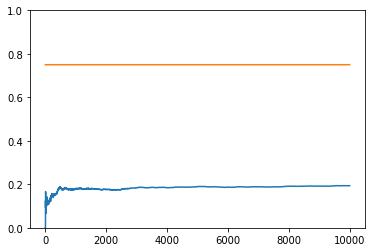

In [18]:
def experiment_greedy():
  bandits = [Bandit(q) for q in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):

    j = np.argmax([b.q_estimate for b in bandits])

    r = bandits[j].pull()

    rewards[i] = r

    bandits[j].update(r)

  for b in bandits:
    print("mean estimate:", b.q_estimate)

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0, 1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

if __name__ == "__main__":
  experiment_greedy()

optimal bandit: 2
mean estimate: 0.13793103448275862
mean estimate: 0.5
mean estimate: 0.7484150145919299
total reward earned: 7458.0
overall win rate: 0.7458
num times selected each bandit: [29.0, 34.0, 9937.0]
num times selected optimal bandit: 9937
num times explored: 85
num times exploited 9915


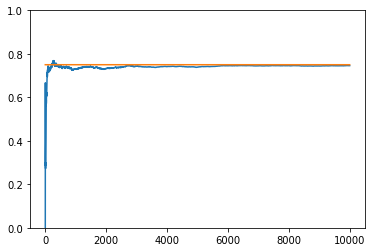

In [37]:
def experiment_epsilon():
  bandits = [Bandit(q) for q in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0
  optimal_bandit = np.argmax([b.q for b in bandits])
  print("optimal bandit:", optimal_bandit)

  for i in range(NUM_TRIALS):
    if np.random.random() < EPSILON:
      num_times_explored += 1
      j = np.random.randint(len(bandits))

    else:
      num_times_exploited += 1
      j = np.argmax([b.q_estimate for b in bandits])

    if j == optimal_bandit:
      num_optimal += 1

    r = bandits[j].pull()

    rewards[i] = r

    bandits[j].update(r)

  for b in bandits:
    print("mean estimate:", b.q_estimate)

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])
  print("num times selected optimal bandit:", num_optimal)
  print("num times explored:", num_times_explored)
  print("num times exploited", num_times_exploited)

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0, 1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

if __name__ == "__main__":
  experiment_epsilon()

mean estimate: 0.0
mean estimate: 0.5714285714285714
mean estimate: 0.748198558847077
total reward earned: 7480.0
overall win rate: 0.748
num times selected each bandit: [1.0, 7.0, 9992.0]


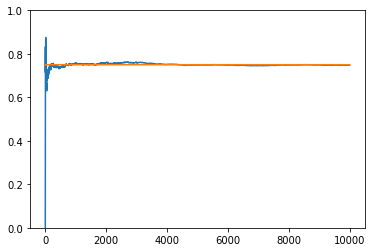

In [39]:
def experiment_optimistic():
  bandits = [Bandit(q) for q in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):

    j = np.argmax([b.q_estimate for b in bandits])

    r = bandits[j].pull()

    rewards[i] = r

    bandits[j].update(r)

  for b in bandits:
    print("mean estimate:", b.q_estimate)

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0, 1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

if __name__ == "__main__":
  experiment_optimistic()